In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prepare import wrangle_grades

plt.rc('font', size=13)
plt.rc('figure', figsize=(13,7))

In [3]:
# Write a Haiku
#5
#7
#5

In [6]:
df = wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=666)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=666)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [9]:
train.head()

,exam1,exam2,exam3,final_grade
69,93,90,96,97
64,70,75,78,72
40,98,93,96,95
0,100,90,95,96
28,85,83,87,87


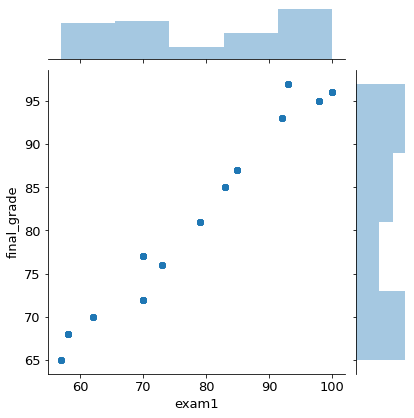

In [12]:
sns.jointplot('exam1', 'final_grade', data=train)

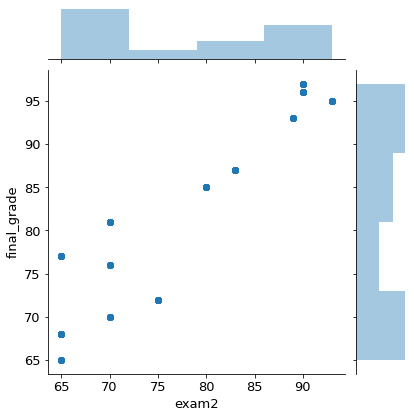

In [13]:
sns.jointplot('exam2', 'final_grade', data=train)

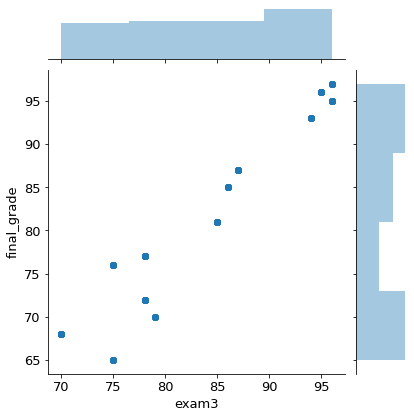

In [14]:
sns.jointplot('exam3', 'final_grade', data=train)

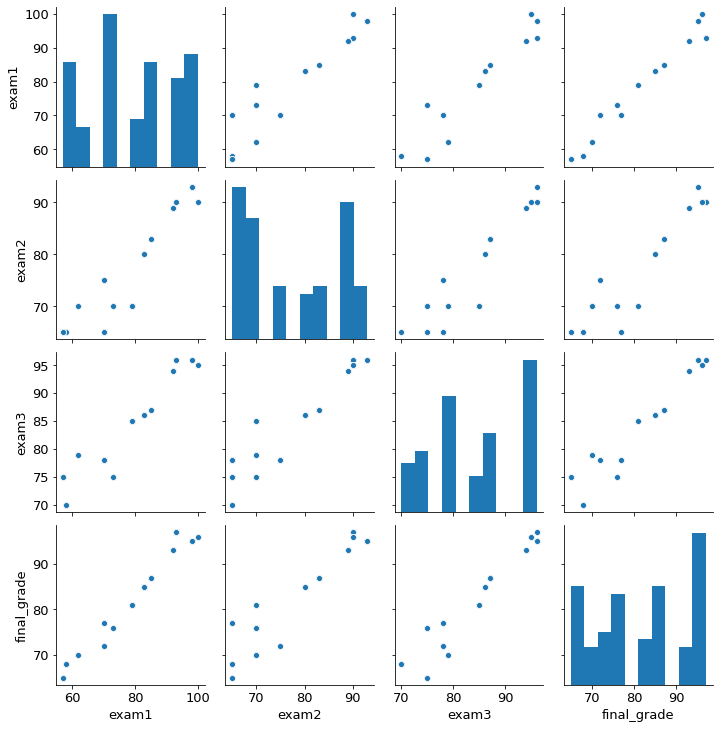

In [16]:
sns.pairplot(train)

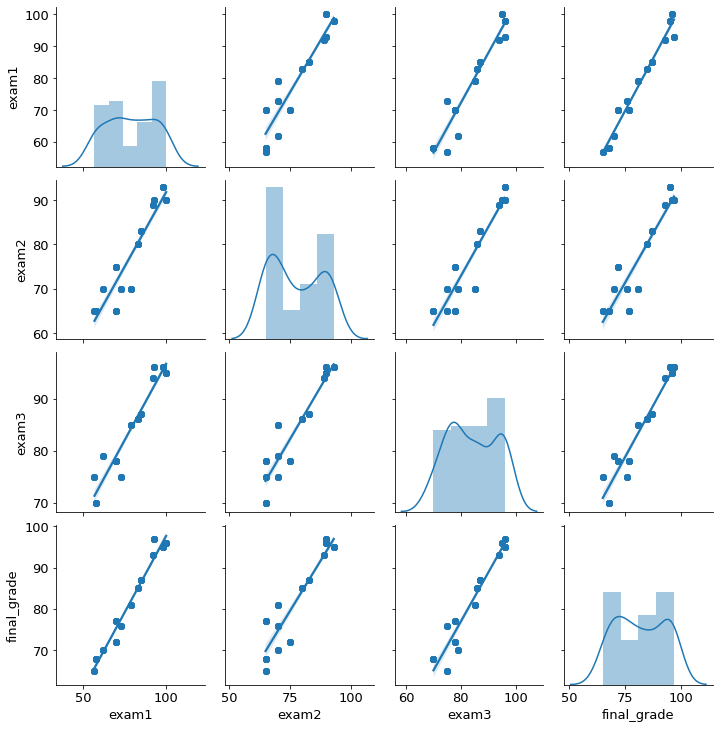

In [18]:
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

In [21]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.935769,0.958611,0.983957
exam2,0.935769,1.000000,0.939010,0.925592
exam3,0.958611,0.939010,1.000000,0.962582
final_grade,0.983957,0.925592,0.962582,1.000000


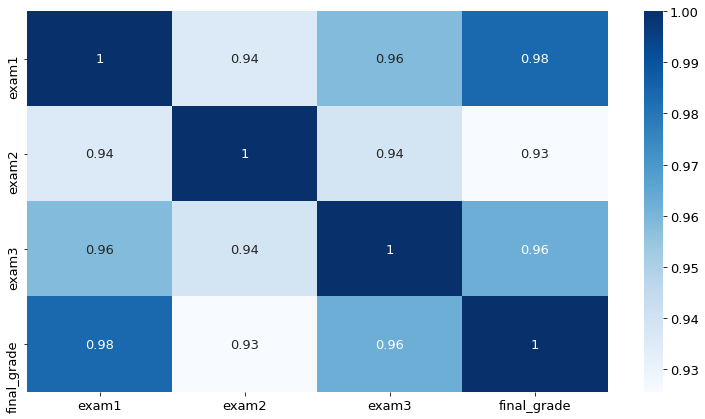

In [34]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

**Takeaways:**

 * exam 2 has least correlation with final grade
 * exam 1 has highest correlation with final grade

In [39]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0, 60, 70, 80, 90, 105], labels=['F', 'D', 'C', 'B', 'A'])

<ipython-input-39-18386df6a180>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0, 60, 70, 80, 90, 105], labels=['F', 'D', 'C', 'B', 'A'])


In [42]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
69,93,90,96,97,A
64,70,75,78,72,D
40,98,93,96,95,A
0,100,90,95,96,A
28,85,83,87,87,B


Viz types for continuous x categorical:
 * boxplot
 * bar chart
 * violin
 * swarmplot

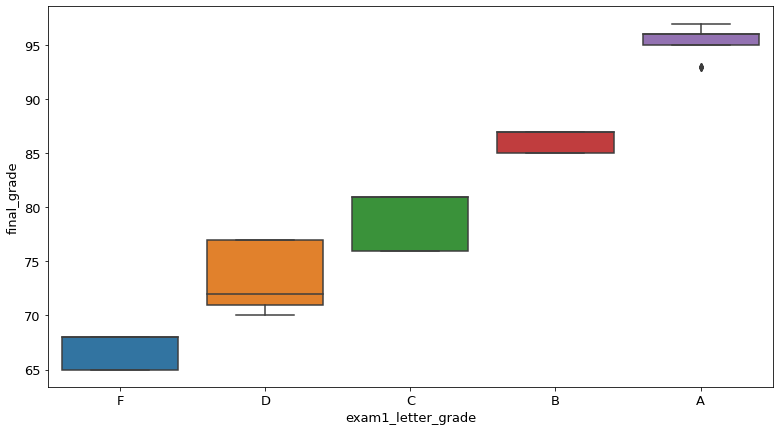

In [43]:
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

Students with Ds have the most variation in grades
 * maybe this is due to different study habits or workflows?
 
Bs have the least variation
 * maybe this is because there's fewer observations in the B category


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

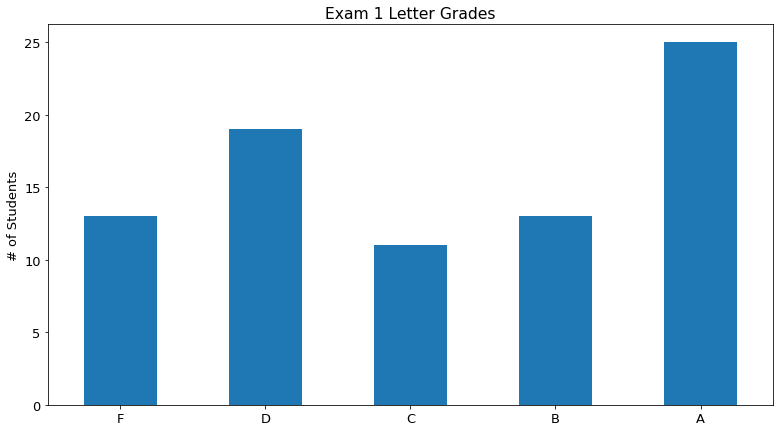

In [48]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grades')
plt.xticks(rotation=0)

In [61]:
np.random.seed(123)
# make a fake category
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])

<ipython-input-61-bad3dff0c6dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])


In [62]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
69,93,90,96,97,A,One
64,70,75,78,72,D,Two
40,98,93,96,95,A,One
0,100,90,95,96,A,One
28,85,83,87,87,B,One


(0.0, 100.0)

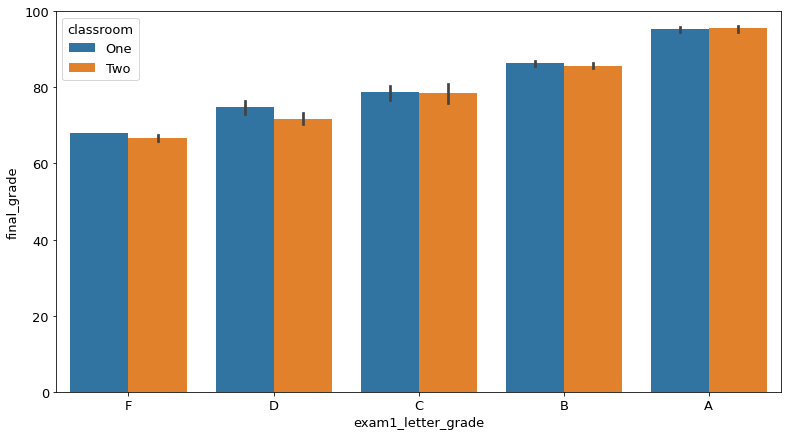

In [63]:
sns.barplot(data=train, y='final_grade', x='exam1_letter_grade', hue='classroom')
plt.ylim(0, 100)

**Takeaways:**
 * The distribution of grades in classroom one and classroom two are about the same.
 * Classroom doesn't impact grade

 - alpha = 0.5
 - $H_0$: There is no difference in final grade between classroom one and classroom two.
 - $H_a$: There is a difference in final grade between classroom one and classroom two.

We need a two sample two-tailed t-test.

In [64]:
from scipy import stats

In [65]:
stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var=False
)

Ttest_indResult(statistic=3.1595259828943, pvalue=0.0023673537761318914)

With a p-value of .002, we reject the null hypothesis that there is no difference in final grade between classroom one and classroom two.

p-value: P(observe our data due to change | H0)

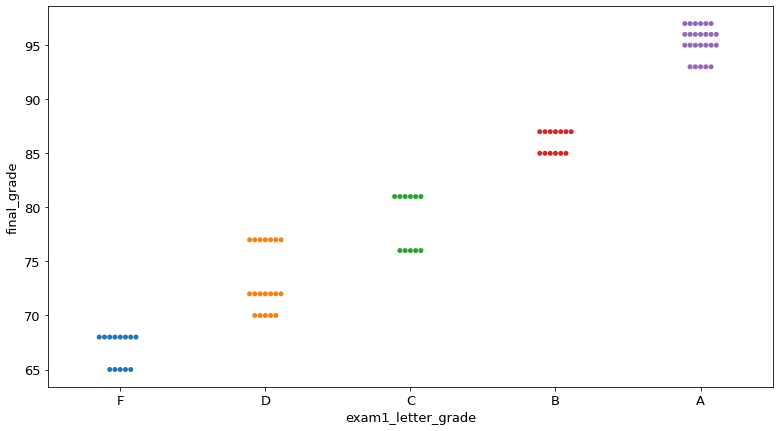

In [67]:
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

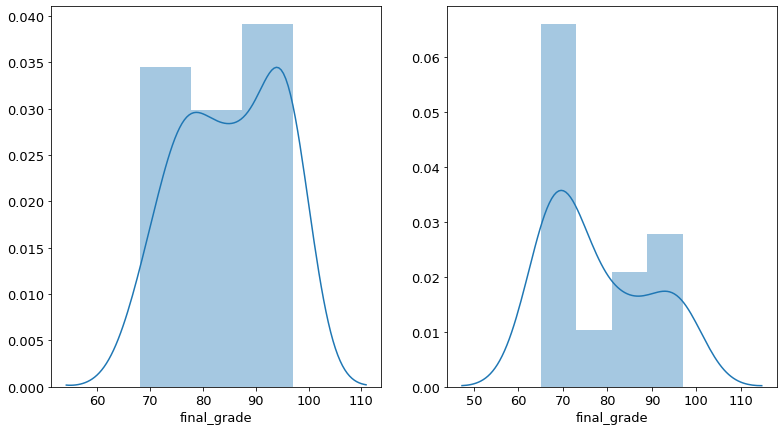

In [70]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

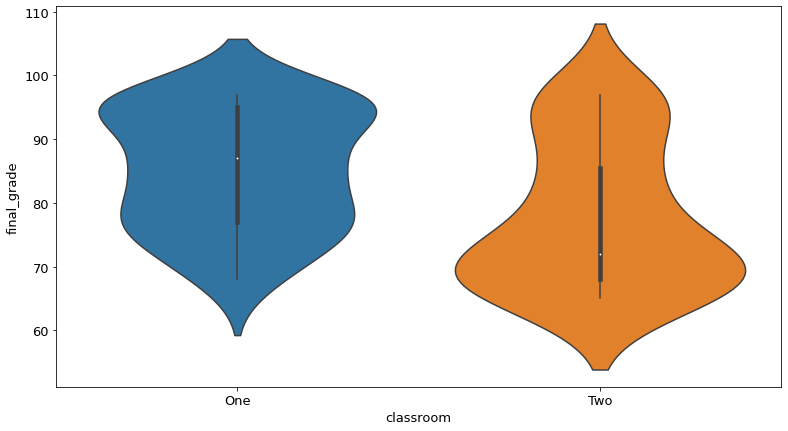

In [68]:
sns.violinplot(data=train, y='final_grade', x='classroom')

Categorical and Categorical
 - crosstab

In [71]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
69,93,90,96,97,A,One
64,70,75,78,72,D,Two
40,98,93,96,95,A,One
0,100,90,95,96,A,One
28,85,83,87,87,B,One


In [72]:
pd.crosstab(train.exam1_letter_grade, train.classroom)

classroom,One,Two
exam1_letter_grade,,
F,2,11
D,10,9
C,7,4
B,9,4
A,17,8


In [81]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)

In [82]:
pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True).applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
F,2.5%,13.6%
D,12.3%,11.1%
C,8.6%,4.9%
B,11.1%,4.9%
A,21.0%,9.9%


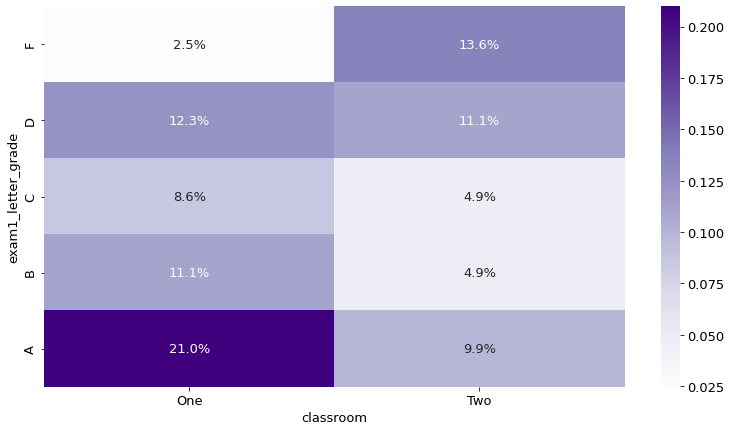

In [86]:
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')

In [98]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='columns').round(2)

exam1_letter_grade,F,D,C,B,A
classroom,,,,,
One,0.15,0.53,0.64,0.69,0.68
Two,0.85,0.47,0.36,0.31,0.32


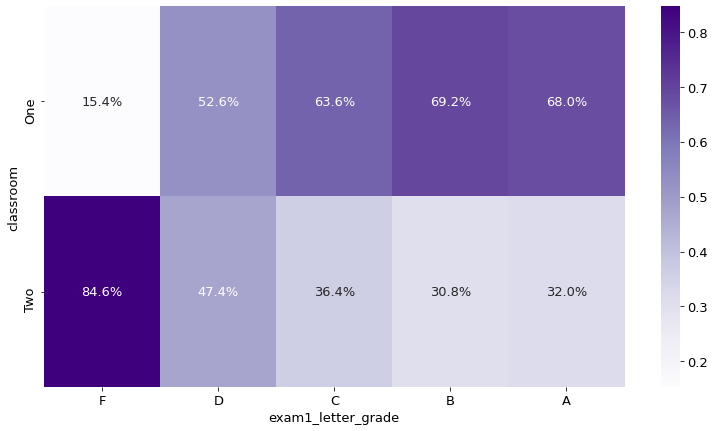

In [100]:
sns.heatmap(pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='columns'), cmap='Purples', annot=True, fmt='.1%')